# **Exploratory Data Analysis (EDA) of Brazil's National Exam (ENEM) 2022 microdata**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loads the data from the preprocessed file
file_path = '../data/df_prep.csv'
df = pd.read_csv(file_path, sep=';', encoding='iso-8859-1')
df

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,Q033B_hab,Q033C_hab,Q033D_hab,Q033E_hab,Q033F_hab,Q033G_hab,Q033H_hab,Q033I_hab,Q033J_hab,Q034_hab
0,210057943671,Between 41 and 45 years old,Male,Married/Living with partner,Black,Brazilian,High School completed,2020,No response,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,210057516120,Between 41 and 45 years old,Male,Married/Living with partner,White,Brazilian,High School completed,Before 2007,No response,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210057280536,20 years old,Female,Single,Black,Brazilian,High School completed,2020,No response,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210055724397,21 years old,Male,Single,Mixed (Pardo),Brazilian,High School completed,2020,No response,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Well prepared.
4,210055097896,19 years old,Male,Not informed,Mixed (Pardo),Brazilian,High School completed,2021,No response,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476103,210056389903,18 years old,Male,Single,White,Brazilian,Completing High School in 2022,Not informed,Public,Regular Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3476104,210057205644,Between 41 and 45 years old,Female,Married/Living with partner,White,Brazilian,Completing High School in 2022,Not informed,Public,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3476105,210056699189,17 years old,Male,Single,White,Brazilian,Completing High School in 2022,Not informed,Public,Regular Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3476106,210056983033,18 years old,Male,Single,Mixed (Pardo),Brazilian,Completing High School in 2022,Not informed,Private,Regular Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data distribution charts**

### **Candidates by age group**

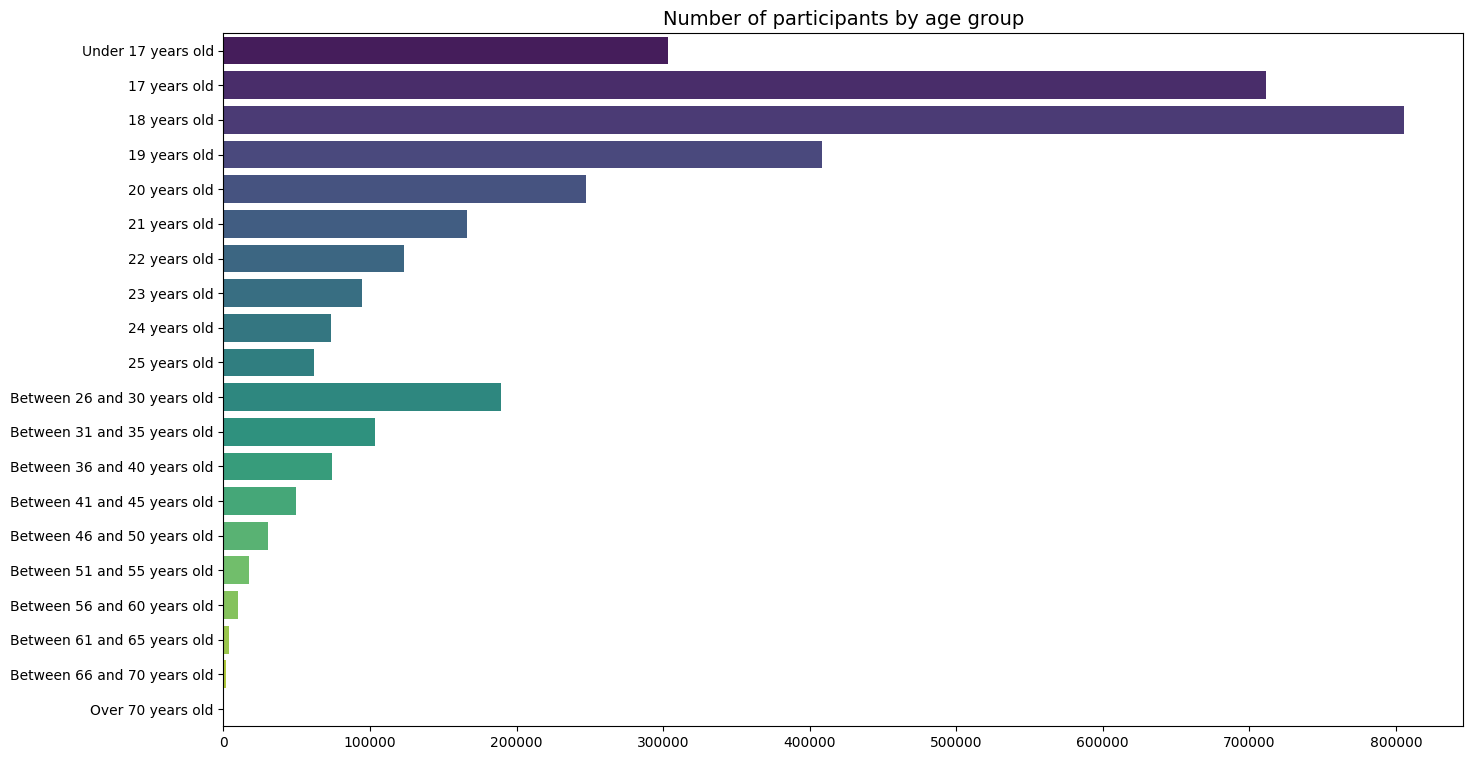

In [3]:
# Defines the order of age groups, placing 'Under 17 years old' at the beginning
age_order = sorted(df['TP_FAIXA_ETARIA'].dropna().unique())
age_order = ['Under 17 years old'] + [age for age in age_order if age != 'Under 17 years old']

# Gets the participant count by age group
age_counts = df['TP_FAIXA_ETARIA'].value_counts().reindex(age_order)

# Creates the chart
plt.figure(figsize=(16, 9))
sns.barplot(y=age_counts.index.astype(str), x=age_counts.values, palette='viridis')

# Sets the chart title
plt.title('Number of participants by age group', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Displays the chart
plt.show()

This bar chart displays the distribution of Brazil's national exam (ENEM) 2022 examinees by age group.
#
+ **Most candidates are young** – the highest concentration is between 17 and 20 years old, peaking at 17 and 18. This is expected, as most students take the exam during or immediately after high school.

+ **Declining numbers with age** – after age 20, participation drops progressively, with few candidates over 30.

+ **Adult participation** – there is still a notable number of examinees between 26 and 30, suggesting people seeking new educational opportunities.

+ **Very low elderly participation** – groups such as 66 to 70 and over 70 barely appear on the chart, indicating that older candidates are exceptions.

### **Proportion of men and women**

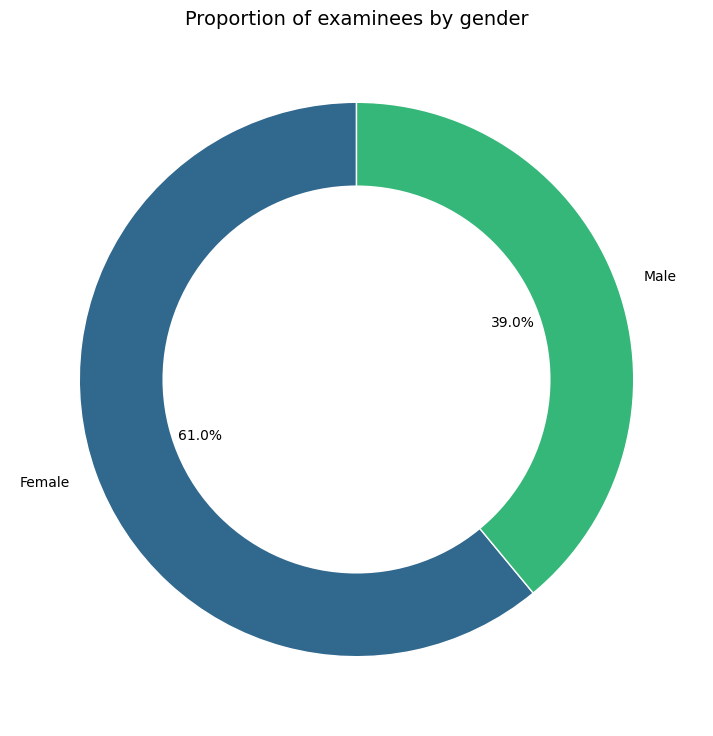

In [4]:
# Counts the number of men and women
gender_counts = df['TP_SEXO'].value_counts()

# Colors
colors = sns.color_palette('viridis', len(gender_counts))

# Creates the donut chart
fig, ax = plt.subplots(figsize=(16, 9))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})
ax.add_artist(plt.Circle((0, 0), 0.70, fc='white')) # Adds the center circle to form the donut

# Sets the title
plt.title('Proportion of examinees by gender', fontsize=14)

# Displays the chart
plt.show()

This donut chart shows the proportion of ENEM examinees by gender.
#
+ **Predominance of women** – the majority of examinees are female, which is a common trend in ENEM editions, reflecting higher female participation in higher education.

+ **Lower participation of men** – male candidates represent a significantly smaller proportion compared to women.

+ **Balanced but unequal distribution** – although not an extreme imbalance, there is a notable difference between genders.

### **Examinees by ethnicity**

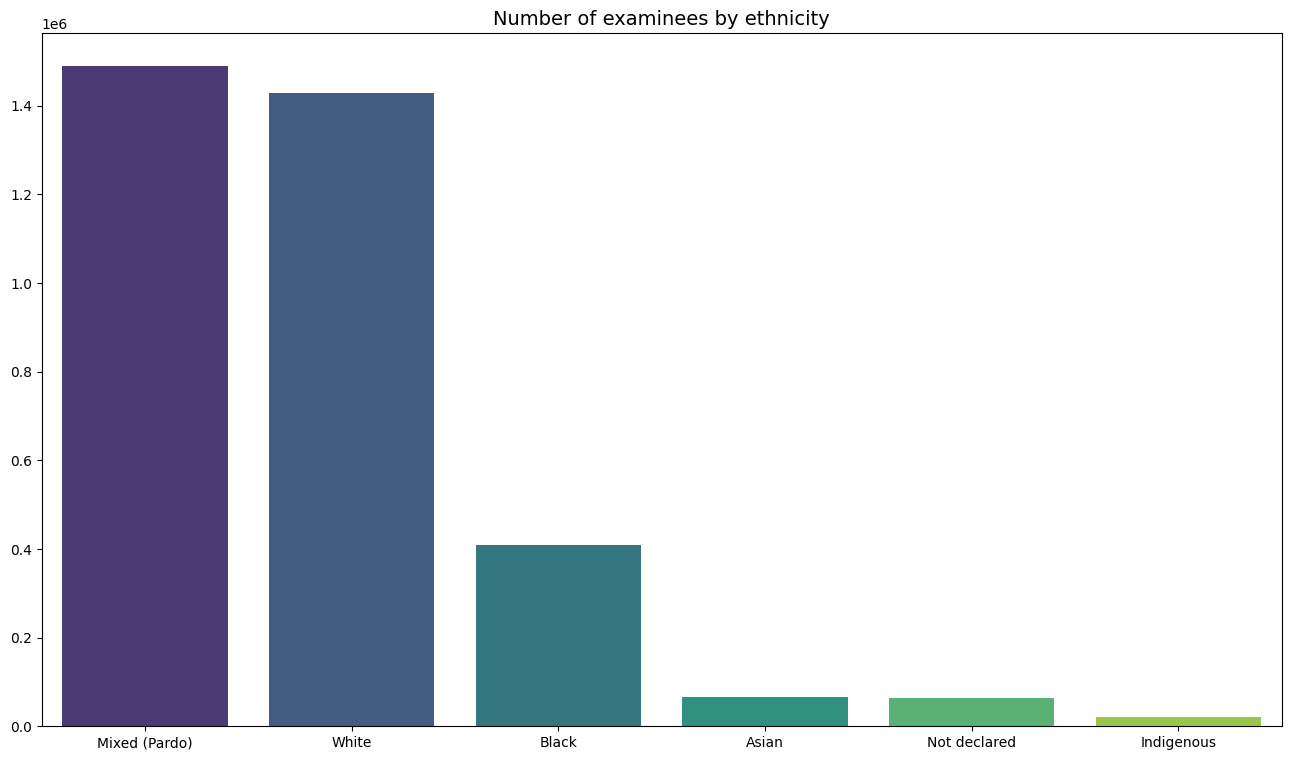

In [5]:
# Counts the number of examinees by ethnicity
ethnicity_counts = df['TP_COR_RACA'].value_counts()

# Colors
colors = sns.color_palette('viridis', len(ethnicity_counts))

# Creates the bar chart
plt.figure(figsize=(16, 9))
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette=colors)

# Sets the title and removes axis labels
plt.title('Number of examinees by ethnicity', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Displays the chart
plt.show()

The distribution of examinees by ethnicity reflects Brazilian demographics:
#
+ **Mixed-race (Pardo) and White** are the majority, with similar numbers.

+ **Black** individuals have a smaller but still significant participation rate.

+ **Asian and Indigenous** represent a very small portion.
#
The distribution follows Census patterns, reflecting the country's racial composition.

### **Examinees by family income**

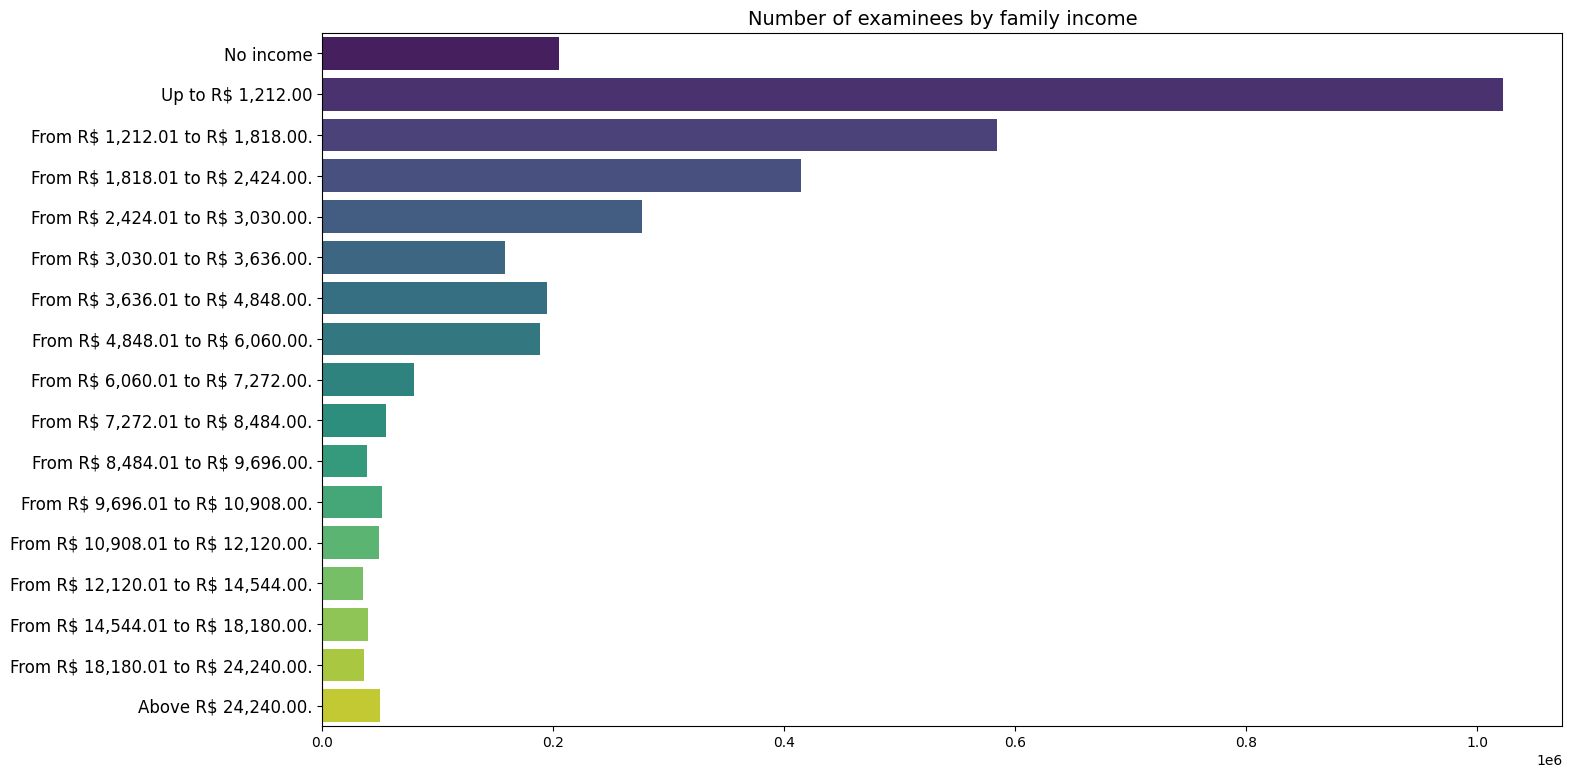

In [6]:
# Defines the correct order for income categories
income_order = [
    'No income',
    'Up to R$ 1,212.00',
    'From R$ 1,212.01 to R$ 1,818.00.',
    'From R$ 1,818.01 to R$ 2,424.00.',
    'From R$ 2,424.01 to R$ 3,030.00.',
    'From R$ 3,030.01 to R$ 3,636.00.',
    'From R$ 3,636.01 to R$ 4,848.00.',
    'From R$ 4,848.01 to R$ 6,060.00.',
    'From R$ 6,060.01 to R$ 7,272.00.',
    'From R$ 7,272.01 to R$ 8,484.00.',
    'From R$ 8,484.01 to R$ 9,696.00.',
    'From R$ 9,696.01 to R$ 10,908.00.',
    'From R$ 10,908.01 to R$ 12,120.00.',
    'From R$ 12,120.01 to R$ 14,544.00.',
    'From R$ 14,544.01 to R$ 18,180.00.',
    'From R$ 18,180.01 to R$ 24,240.00.',
    'Above R$ 24,240.00.'
]

# Counts income categories
income_counts = df['Q006'].value_counts().reindex(income_order).dropna()

# Creates the chart
plt.figure(figsize=(16, 9))
sns.barplot(y=income_counts.index, x=income_counts.values, palette='viridis')

# Fixes y-axis ticks to avoid LaTeX interpretation of the '$' sign
plt.gca().set_yticklabels([label.replace('$', r'\$') for label in income_counts.index], fontsize=12)

# Sets the title
plt.title('Number of examinees by family income', fontsize=14)
plt.xlabel('')
plt.ylabel('')

# Displays the chart
plt.show()

This chart displays the distribution of ENEM examinees by family income.
#
+ **Majority with low income** – a large portion of the candidates belong to families with no income or up to R$ 1,212.00. This suggests that many examinees are in a vulnerable socioeconomic situation.

+ **Participation decreases as income increases** – as the family income bracket rises, the number of participants progressively decreases, indicating both that there are fewer high-income families and that they participate less in the ENEM.

+ **Small participation from high-income families** – brackets above R$ 10,000.00 have a significantly lower number of candidates.

+ **Intermediate income highlight** – there is a considerable concentration between R$ 3,000.00 and R$ 6,000.00, showing a significant presence of the middle class.
#
This pattern reinforces that the ENEM plays a major role in providing access to higher education for low-income students.

### **Number of examinees by state**

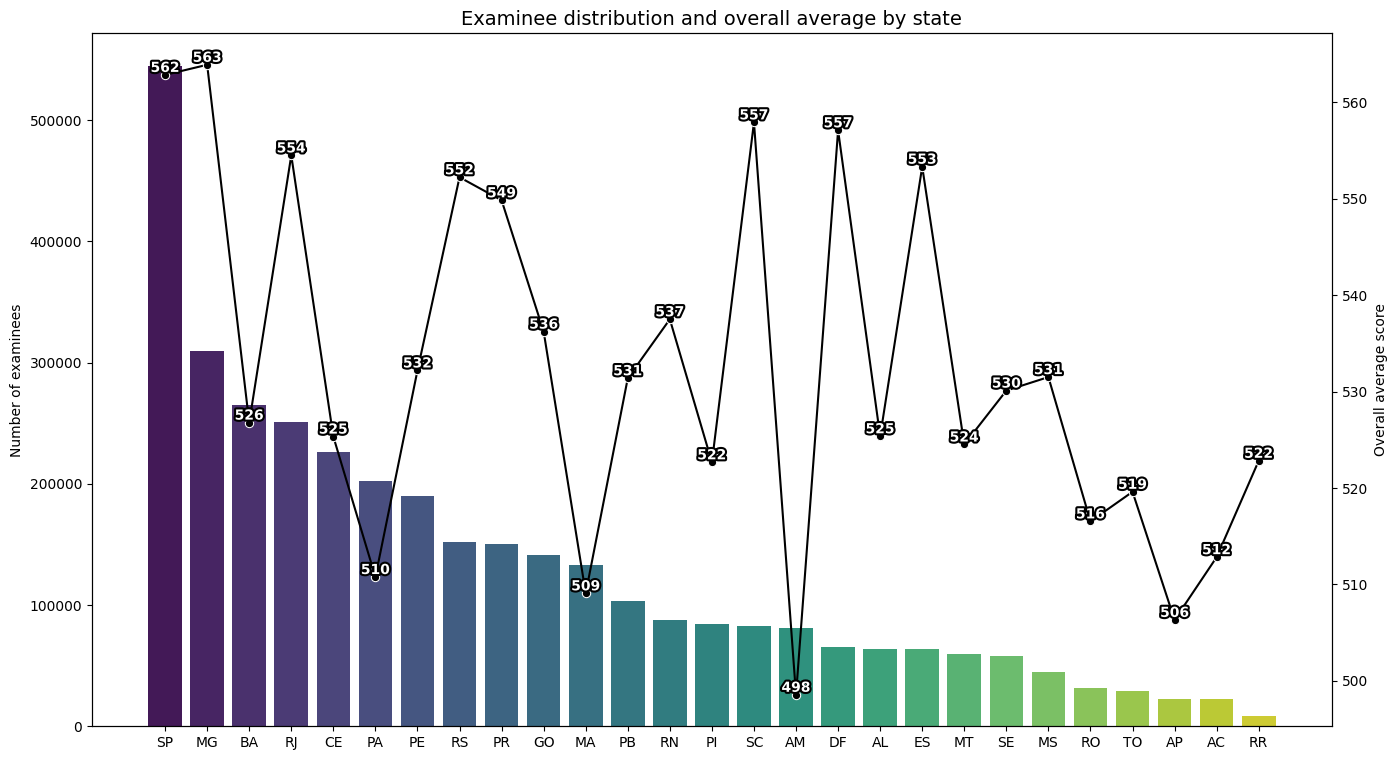

In [7]:
import matplotlib.patheffects as path_effects

# Counts examinees by state and sorts by amount
uf_counts = df['SG_UF_PROVA'].value_counts(ascending=False)

# Calculates the overall average score per state
overall_avg_uf = df.groupby('SG_UF_PROVA')[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().mean(axis=1)
overall_avg_uf = overall_avg_uf.loc[uf_counts.index]  # Sorts according to the number of examinees

# Creates the chart
fig, ax1 = plt.subplots(figsize=(16, 9))

# Bar chart for number of examinees
sns.barplot(x=uf_counts.index, y=uf_counts.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Number of examinees', color='black')

# Creates a second y-axis for the average scores
ax2 = ax1.twinx()
sns.lineplot(x=overall_avg_uf.index, y=overall_avg_uf.values, color='black', marker='o', ax=ax2)
ax2.set_ylabel('Overall average score', color='black')

# Adds labels
for i, txt in enumerate(overall_avg_uf.values):
    text = ax2.text(i, txt, f'{int(txt)}', ha='center', va='bottom', fontsize=10, fontweight='bold',
                    color='white', path_effects=[path_effects.withStroke(linewidth=3, foreground='black')]) # White border and black text

# Sets the title
plt.title('Examinee distribution and overall average by state', fontsize=14)
ax1.set_xlabel('')

# Displays the chart
plt.show()

This chart displays the distribution of ENEM examinees and overall averages by state.

Regarding the number of examinees:
+ **São Paulo leads by a wide margin** - the state of São Paulo (SP) has by far the largest number of examinees, reflecting its larger population.

+ **Other states with high participation** - Minas Gerais (MG), Rio de Janeiro (RJ), and Ceará (CE) also show a large number of candidates, which aligns with their populations and educational policies.

+ **Northern and Central-West states with fewer enrollments** - states like Roraima (RR), Amapá (AP), Acre (AC), and Tocantins (TO) have significantly fewer examinees, likely due to lower population density and educational infrastructure.

+ **Distribution follows population size** - the overall trend of the chart reflects Brazilian demographics, where the most populous states have the most examinees.

Regarding scores by state:
+ **South and Southeast regions lead** - states in these regions show higher averages, reflecting greater access to private schools, better infrastructure, and higher quality education.

+ **Central-West with mid-range performance** - the region shows relatively high averages, especially in the Distrito Federal, alongside relatively lower averages, such as in Mato Grosso.

+ **Northeast and North have lower averages** - the overall average tends to be lower in these regions, possibly due to educational inequalities and less access to resources. There is a higher dependency on public education, which may face more structural challenges.

### **Score distribution by exam area**

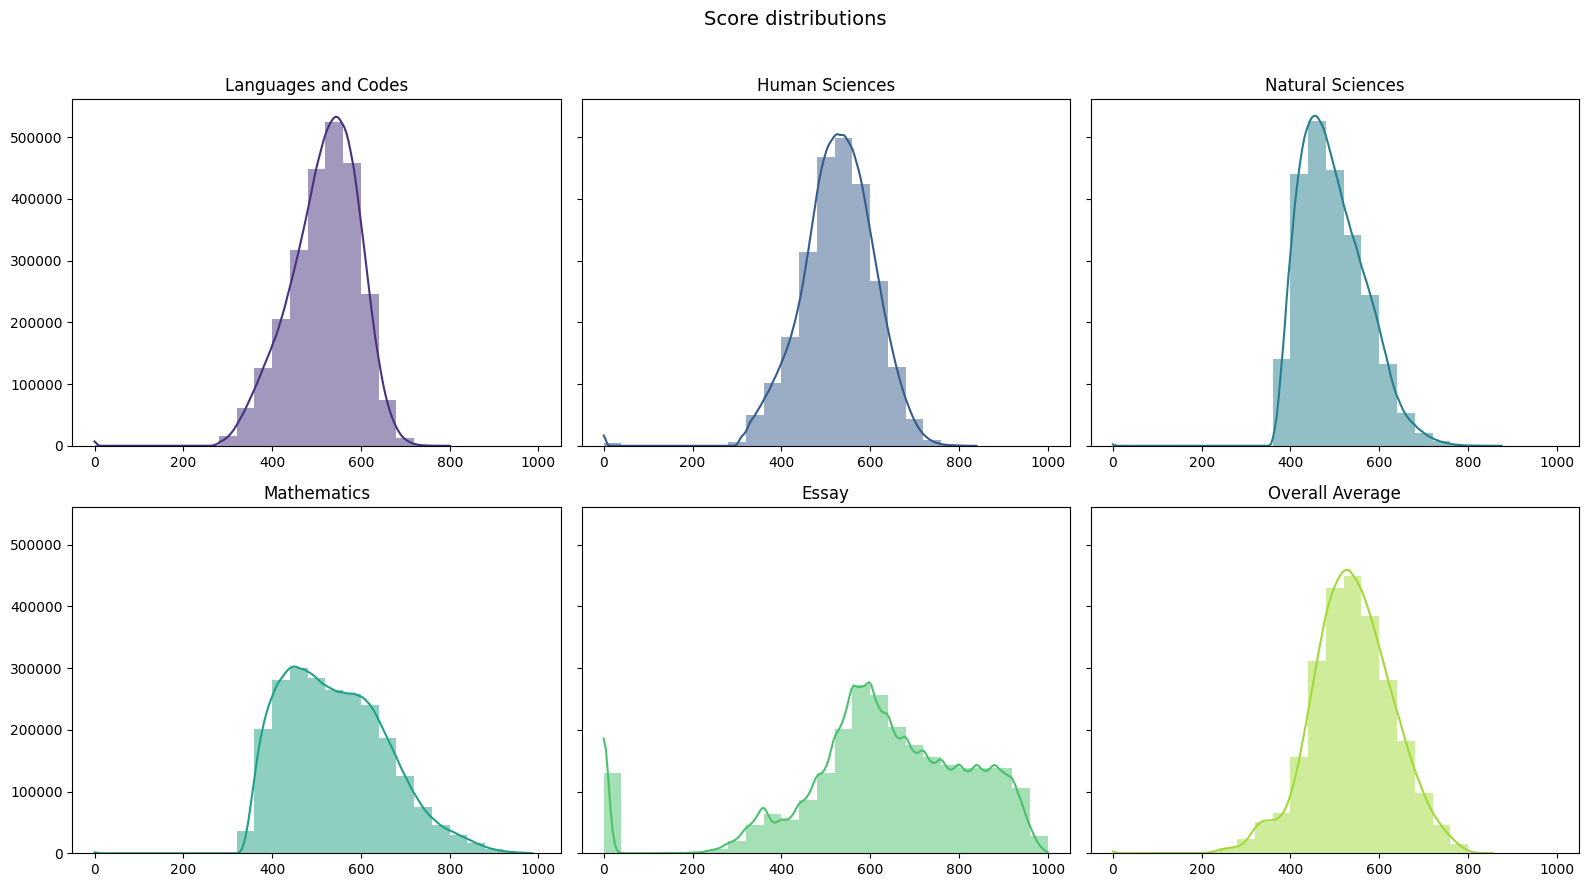

In [8]:
# Defines the score columns
score_columns = [
    'NU_NOTA_LC',      # Languages
    'NU_NOTA_CH',      # Human Sciences
    'NU_NOTA_CN',      # Natural Sciences
    'NU_NOTA_MT',      # Mathematics
    'NU_NOTA_REDACAO', # Essay
]

# Calculates the final unweighted average
df['NU_MEDIA_GERAL'] = df[score_columns].mean(axis=1, skipna=True)
score_columns.append('NU_MEDIA_GERAL')

# Defines titles for subplots
titles = ['Languages and Codes', 'Human Sciences', 'Natural Sciences', 'Mathematics', 'Essay', 'Overall Average']

# Creates subplots sharing y-axes
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
fig.suptitle('Score distributions', fontsize=14)

# Colors
colors = sns.color_palette('viridis', len(score_columns))

# Defines fixed bin width
bin_width = 40
bin_edges = range(0, 1001, bin_width)

# Generates histograms
for ax, col, title, color in zip(axes.flat, score_columns, titles, colors):
    sns.histplot(df[col].dropna(), bins=bin_edges, ax=ax, kde=True, color=color, edgecolor=None)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjusts layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The histograms show the distribution of scores in each exam, revealing important patterns:
#
+ **Languages, Human Sciences, Natural Sciences, and Overall Average** – approximately normal distribution, with most scores between 400 and 700 points.

+ **Mathematics** – right-skewed distribution, indicating it is easier to reach high scores. Highest concentration is between 400 and 600, but with a significant amount of scores above 800 points.

+ **Essay** – bimodal distribution, with peaks at 600 and 0. The peak at 0 indicates examinees who failed to score any points, which is a common occurrence in the exam.

### **Difference between public and private schools**

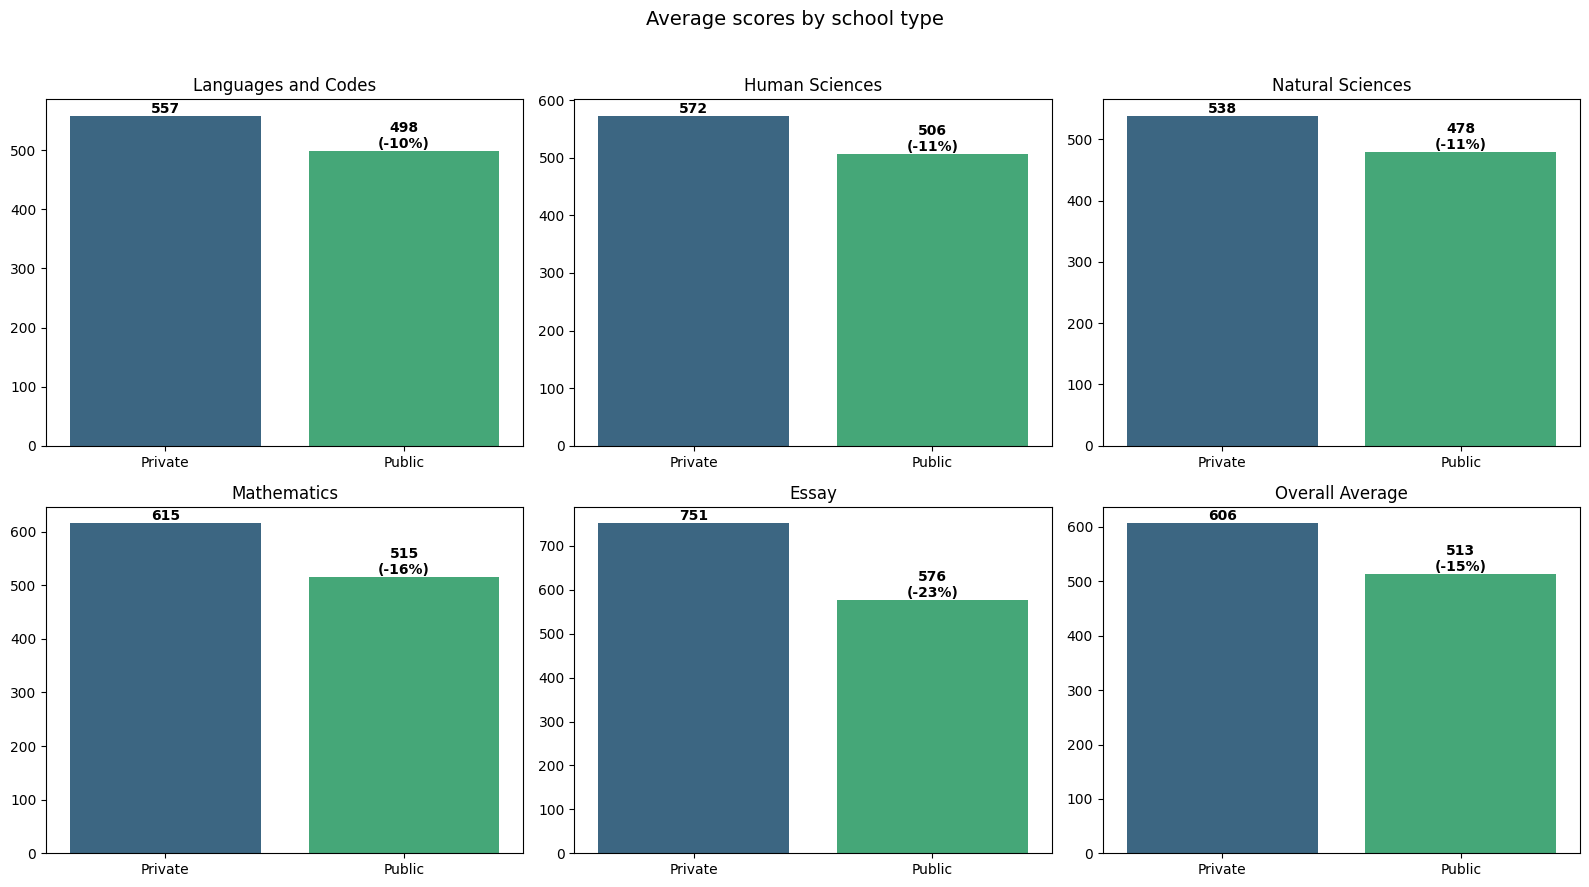

In [9]:
# Creates the subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Average scores by school type', fontsize=14)

# Colors
colors = sns.color_palette('viridis', 2)

# Generates the bar charts
for ax, col, title in zip(axes.flat, score_columns, titles):
    averages = df[df['TP_ESCOLA'] != 'No response'].groupby('TP_ESCOLA')[col].mean().dropna()
    if not averages.empty:
        bars = sns.barplot(x=averages.index, y=averages.values, ax=ax, palette=colors)
        private = averages.get('Private', 0)
        public = averages.get('Public', 0)
        
        for bar in bars.patches:
            value = int(bar.get_height())
            label = f'{value}'
            
            # Adds the percentage difference to the public school bar
            if bar.get_x() > 0.5 and private > 0:
                difference = ((private - public) / private) * 100
                label = f'{value}\n(-{int(difference)}%)'
            
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(), # Y position at the top of the bar
                label,
                ha='center', va='bottom', fontsize=10, fontweight='bold'
            )
    
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjusts layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

This set of charts compares the average scores between public and private school students in ENEM 2022, highlighting the percentage difference for public schools.
#
+ **Consistently superior performance in private schools**
    + In all exams, candidates from private schools had higher averages compared to those from public schools.
    + The largest gap occurs in the Essay (-23%), while the smallest difference appears in Languages and Codes (-10%).

+ **Mathematics and Essay show the greatest disparities**

+ **Natural Sciences, Languages and Codes, and Human Sciences have smaller differences**

+ **Overall average reflects the pattern**
  + **Private:** 606  
  + **Public:** 513 (-15%)  
#
The superior performance of private school candidates reflects factors such as better infrastructure, more preparation time, and teaching specifically targeted at the ENEM.
The greater disparity in the Essay may indicate difficulties in writing and text interpretation among public school students.

### **Correlation between performance in Languages and Codes and Essay**

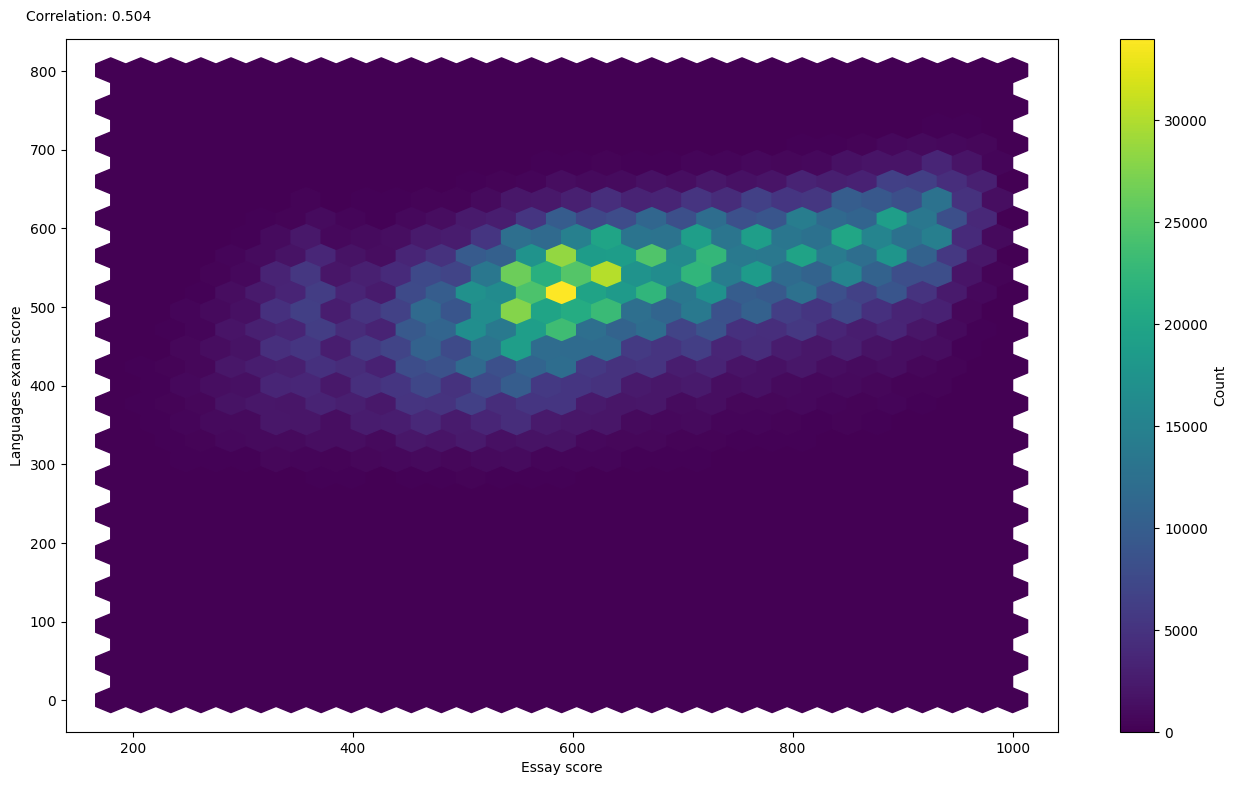

In [10]:
# Function to remove outliers
def get_limits(df, var):
    iqr = np.quantile(df[var], 0.75) - np.quantile(df[var], 0.25)
    lower_lim = np.quantile(df[var], 0.25) - 1.5 * iqr
    upper_lim = np.quantile(df[var], 0.75) + 1.5 * iqr
    return df[(df[var] > lower_lim) & (df[var] < upper_lim)]

# Filters valid values and removes outliers in the essay scores
subset = df[['NU_NOTA_REDACAO', 'NU_NOTA_LC']].dropna()
subset = get_limits(subset, 'NU_NOTA_REDACAO')

# Calculates correlation
correlation = np.corrcoef(subset['NU_NOTA_REDACAO'], subset['NU_NOTA_LC'])[0, 1]

# Creates the hexbin plot
fig, ax = plt.subplots(figsize=(16, 9))
hb = ax.hexbin(subset['NU_NOTA_REDACAO'], subset['NU_NOTA_LC'], gridsize=30, cmap='viridis')

# Sets labels and displays correlation
ax.set_xlabel('Essay score')
ax.set_ylabel('Languages exam score')
plt.colorbar(hb, label='Count')
plt.figtext(0.1, 0.9, f'Correlation: {correlation:.3f}', fontsize=10, color='black')

# Displays the chart
plt.show()

This chart presents the correlation between Essay and Languages and Codes scores in ENEM 2022.
#
+ **Moderate positive correlation** - the 0.504 correlation indicates a positive trend: candidates who get high scores in the Essay tend to have high scores in the Languages exam. However, the value is not perfectly linear, suggesting that other factors also influence the relationship between these scores.

+ **Centralized distribution** - most candidates have scores between 400 and 700 in both exams. The regions with the highest concentration of candidates appear in green/yellow, indicating a high number of participants in this range.

+ **Presence of extreme scores** - there are few candidates with very low scores in both exams. There are also candidates with high scores in the essay (~900-1000) without necessarily achieving equivalent scores in Languages.
#
The Languages exam involves interpretation and grammar, while the essay evaluates writing and argumentation. Candidates may struggle with only one of these skills, causing the dispersion observed in the chart.

## **Descriptive statistics**

In [11]:
# Relevant columns
relevant_columns = [
    # Socioeconomic conditions
    'TP_ESCOLA',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA', 
    'IN_TREINEIRO', # Whether the candidate is a "treineiro" (practice-only) can be relevant to predict score or attendance
    'Q002',         # Mother's or female guardian's education level
    'Q005',         # Number of people living in the same household
    'Q006',         # Monthly family income
    'Q022',         # Has a cell phone
    'Q024',         # Has a computer
    'Q025',         # Has internet access

    # Socioeconomic variables can be used to predict the candidate's score. Kept as potential target variables
    'NU_NOTA_LC',
    'NU_NOTA_CH',
    'NU_NOTA_CN',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',

    # Information can also be used to predict if the candidate will miss an exam. Kept as potential target variables
    'TP_PRESENCA_LC',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_MT'
]

# Displays general information
display(df[relevant_columns].info())

# Descriptive statistics for the selected columns only
display(df[relevant_columns].describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476108 entries, 0 to 3476107
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_ESCOLA        object 
 1   TP_SEXO          object 
 2   TP_COR_RACA      object 
 3   TP_FAIXA_ETARIA  object 
 4   IN_TREINEIRO     object 
 5   Q002             object 
 6   Q005             int64  
 7   Q006             object 
 8   Q022             object 
 9   Q024             object 
 10  Q025             object 
 11  NU_NOTA_LC       float64
 12  NU_NOTA_CH       float64
 13  NU_NOTA_CN       float64
 14  NU_NOTA_MT       float64
 15  NU_NOTA_REDACAO  float64
 16  TP_PRESENCA_LC   object 
 17  TP_PRESENCA_CH   object 
 18  TP_PRESENCA_CN   object 
 19  TP_PRESENCA_MT   object 
dtypes: float64(5), int64(1), object(14)
memory usage: 530.4+ MB


None

,TP_ESCOLA,TP_SEXO,TP_COR_RACA,TP_FAIXA_ETARIA,IN_TREINEIRO,Q002,Q005,Q006,Q022,Q024,Q025,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_MT
count,3476108,3476108,3476108,3476108,3476108,3476108,3.476108e+06,3476108,3476108,3476108,3476108,2.493445e+06,2.493445e+06,2.355398e+06,2.355398e+06,2.493445e+06,3476108,3476108,3476108,3476108
unique,3,2,6,20,2,8,NaN,17,5,5,2,NaN,NaN,NaN,NaN,NaN,3,3,3,3
top,No response,Female,Mixed (Pardo),18 years old,No,"Completed High School, but did not complete Co...",NaN,"Up to R$ 1,212.00","Yes, three.",No.,Yes.,NaN,NaN,NaN,NaN,NaN,Present,Present,Present,Present
freq,2158547,2120521,1488844,805862,2963376,1217025,NaN,1022869,1056876,1606940,3149735,NaN,NaN,NaN,NaN,NaN,2493445,2493445,2355398,2355398
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.745321e+00,NaN,NaN,NaN,NaN,5.174389e+02,5.269531e+02,4.959306e+02,5.425033e+02,6.184796e+02,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.376848e+00,NaN,NaN,NaN,NaN,7.755488e+01,8.148442e+01,7.200981e+01,1.160225e+02,2.122124e+02,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,NaN,NaN,4.684000e+02,4.770000e+02,4.405000e+02,4.490000e+02,5.200000e+02,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN,5.255000e+02,5.299000e+02,4.856000e+02,5.308000e+02,6.200000e+02,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN,NaN,NaN,5.732000e+02,5.819000e+02,5.433000e+02,6.224000e+02,7.600000e+02,NaN,NaN,NaN,NaN


**General Information**
- The dataset contains a mix of categorical and numerical variables.
- Some score variables have missing values (32% of candidates missed at least one exam day).

**Academic Variables**
- TP_ESCOLA: the majority of candidates studied in public schools.
- IN_TREINEIRO: there is a considerable number of "treineiros" (approximately 15%), meaning candidates who have not yet finished high school.

**Socioeconomic Condition**
- Q002 - the majority of candidates have mothers or female guardians who only completed up to high school.
- Q005 - on average, 3.74 people live in each household, including the candidate.
- Q006 - the majority of candidates fall into lower income brackets.
- Q022 (cell phone), Q024 (computer), and Q025 (internet access) - there are still candidates without access to these essential resources.

**Scores**
- Scores vary significantly, with the distribution concentrated between 400 and 700 points.
- Mathematics shows higher right-skewness, indicating more candidates with high scores.
- Essay shows bimodal behavior, suggesting a specific group that scored zero.

**Attendance and Exam Status**
- TP_PRESENCA_* (attendance): there is a relevant number of candidates who missed one or more exams.
- TP_STATUS_REDACAO: many candidates had their essay nullified or scored zero.

**Conclusions**
- The dataset has a high number of low-income students, reinforcing ENEM's role in access to higher education.
- The score distribution indicates that some exams, such as Mathematics, are easier to score high in than others.
- The Essay has an atypical distribution, with candidates scoring zero and a main group averaging around 600 points.
- There is a considerable absenteeism rate.
- Apparently, **there are no outliers** in the score columns, indicating good data quality.

## **Correlation and encoding**

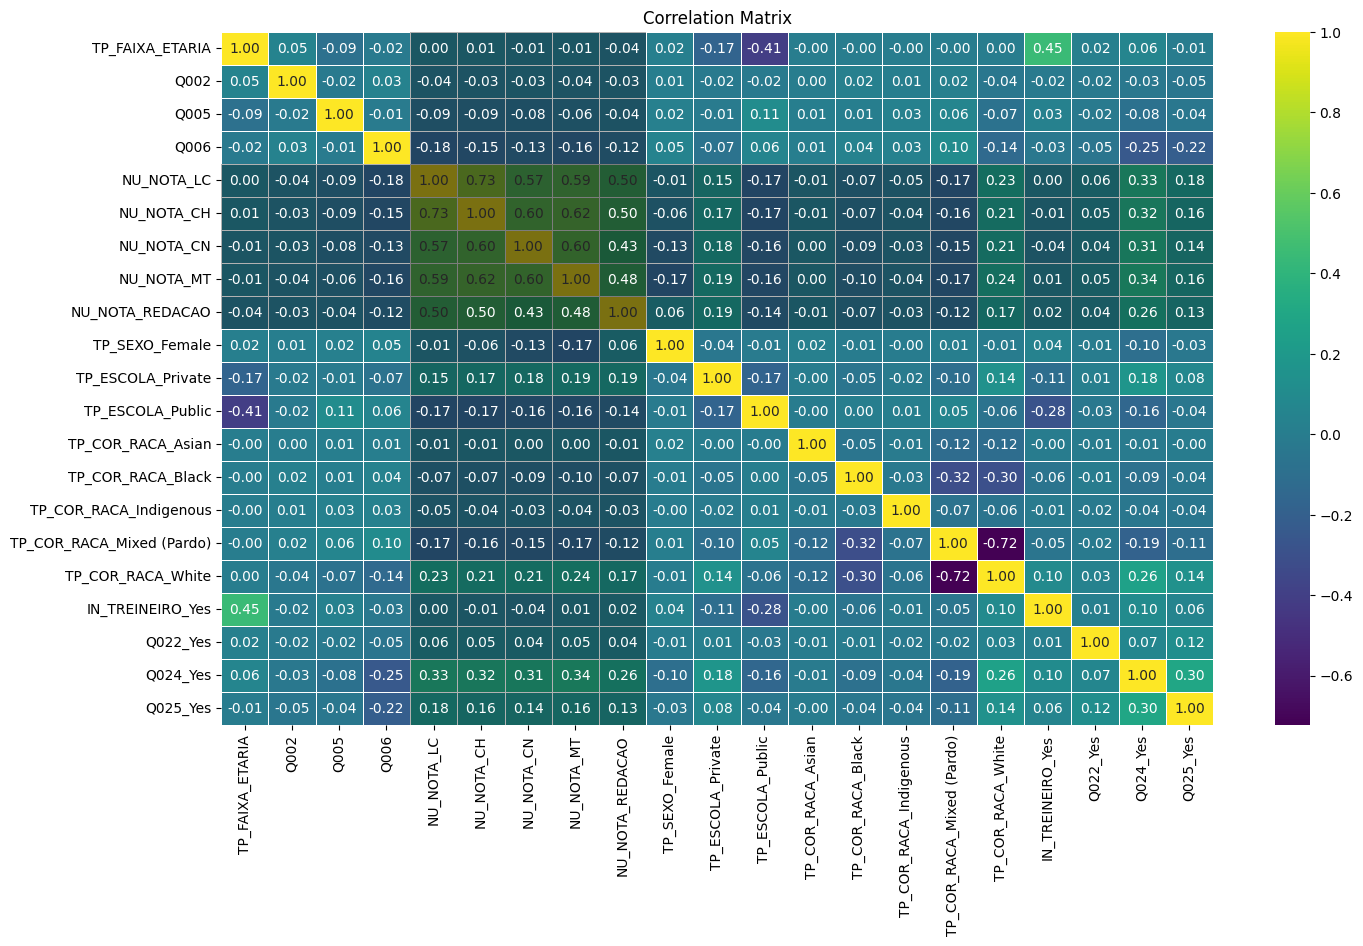

In [15]:
from sklearn.preprocessing import LabelEncoder

# Stores a copy of the original dataframe containing only relevant columns
df_encoded = df[relevant_columns].copy()

# Applies One Hot Encoding to categorical variables without ordinal relationship
one_hot_columns = ['TP_SEXO', 'TP_ESCOLA', 'TP_COR_RACA', 'IN_TREINEIRO', 'Q022', 'Q024', 'Q025']

# Converts 'Q022' (cell phone ownership) to binary format, ignoring quantity
df_encoded['Q022'] = df_encoded['Q022'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')

# Converts 'Q024' (computer ownership) to binary format, ignoring quantity
df_encoded['Q024'] = df_encoded['Q024'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')

# Standardizes 'Q025' values by removing extra dots
df_encoded['Q025'] = df_encoded['Q025'].str.strip('.')

# Generates dummy variables
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns, dtype=int)

# Removes categories that do not provide relevant information for the analysis
columns_to_remove = [
    'TP_SEXO_Male',               # Redundant with female gender
    'TP_ESCOLA_No response',      # Does not contribute to interpretation
    'TP_COR_RACA_Not declared',   # Does not represent an informative group
    'IN_TREINEIRO_No',            # 'IN_TREINEIRO_Yes' already provides the necessary info
    'Q022_No',                    # Redundant, as absence of 'Yes' implies 'No'
    'Q024_No',                    # Redundant, as absence of 'Yes' implies 'No'
    'Q025_No'                     # Redundant, as absence of 'Yes' implies 'No'
]

# Removes only the columns that actually exist in the dataframe
df_encoded.drop(columns=[col for col in columns_to_remove if col in df_encoded.columns], inplace=True)

# Applies Label Encoding to ordinal variables ensuring correct order
education_order = [
    'Never studied.',
    'Did not complete 4th grade/5th year of Elementary School.',
    'Completed 4th grade/5th year, but did not complete 8th grade/9th year of Elementary School.',
    'Completed 8th grade/9th year of Elementary School, but did not complete High School.',
    'Completed High School, but did not complete College.',
    'Completed College, but did not complete Graduate School.',
    'Completed Graduate School.',
    'Unknown.'
]
label_columns = ['TP_FAIXA_ETARIA', 'Q002', 'Q006']
orders = {'TP_FAIXA_ETARIA': np.array(age_order), 'Q002': np.array(education_order), 'Q006': np.array(income_order)}

for col in label_columns:
    encoder = LabelEncoder()
    encoder.fit(orders[col])  # Fits the encoder with the correct order
    df_encoded[col] = encoder.transform(df_encoded[col])

# Replaces "Unknown" mother's education with the most frequent value (High School - 4)
df_encoded['Q002'] = df_encoded['Q002'].replace(7, 4)

# Calculates the correlation matrix using only numeric columns to avoid string conversion errors
# This ensures that non-encoded string columns (like presence) are ignored in the heatmap
correlation_matrix = df_encoded.corr(numeric_only=True)

# Defines columns corresponding to scores
score_columns = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Generates a heatmap to visualize correlation between variables
plt.figure(figsize=(16, 9))
ax = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)

# Gets indices for columns corresponding to scores
score_indices = [correlation_matrix.columns.get_loc(col) for col in score_columns]

# Highlights score areas by drawing semi-transparent rectangles for easier viewing
for idx in score_indices:
    ax.add_patch(plt.Rectangle((idx, 0), 1, len(correlation_matrix), fill=True, color='black', alpha=0.3, lw=0))
    ax.add_patch(plt.Rectangle((0, idx), len(correlation_matrix), 1, fill=True, color='black', alpha=0.3, lw=0))

plt.title('Correlation Matrix')
plt.show()

+ Exam scores have high correlation with each other, **especially between Human Sciences and Languages**.

+ Family income is positively correlated with all scores, indicating that **examinees from higher-income families tend to have superior performance**.

+ **Private school students have higher scores**, while public school students show the opposite trend.

+ **White candidates tend to have higher scores**, while Mixed-race (Pardo) and Black candidates show negative correlations with scores.

+ Owning a computer and having internet access is positively related to performance, suggesting that **access to technology can influence scores**.

In [16]:
# Saves the encoded dataframe for the next stage (feature engineering)
df_encoded.to_csv('../data/df_encoded.csv', sep=';', encoding='iso-8859-1', index=False)